## Milucy Fernandes  

Midterm 

In [209]:
import pandas as pd, matplotlib
from sklearn import tree
from treeviz import tree_print
import seaborn as sns
sns.set()
from sklearn.metrics import accuracy_score

In [210]:
df = pd.read_csv('caesarian.csv')

In [211]:
df.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,False
1,26,2,0,1,0,True
2,26,2,1,1,0,False
3,28,1,0,2,0,False
4,22,2,0,1,0,True


# Preliminary data analysis

### Number of rows and columns 

In [212]:
df.shape

(78, 6)

### Print out the columns header 

In [213]:
df.columns

Index(['Age', 'Delivery number', 'Delivery time', 'Blood of Pressure',
       'Heart Problem', 'Caesarian'],
      dtype='object')

### Display the categorical numerical set 

In [214]:
df['Caesarian'].value_counts()

True     45
False    33
Name: Caesarian, dtype: int64

#### This shows that more women had a caesarian at 45 compare to no caesarian at 33

which also means the mode should be true for this data set

In [215]:
df['Caesarian'].mode()

0    True
dtype: bool

indeed the model is true for this dataframe

### This is a bar graph that represent the number of Caesarian the data set represents 

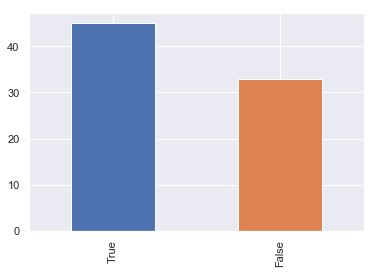

In [216]:
df['Caesarian'].value_counts().plot(kind='bar')

#### Again this shows that there were more number of caeserian completed in this perticular dataf set

# Visualization

## scatter plot 1

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


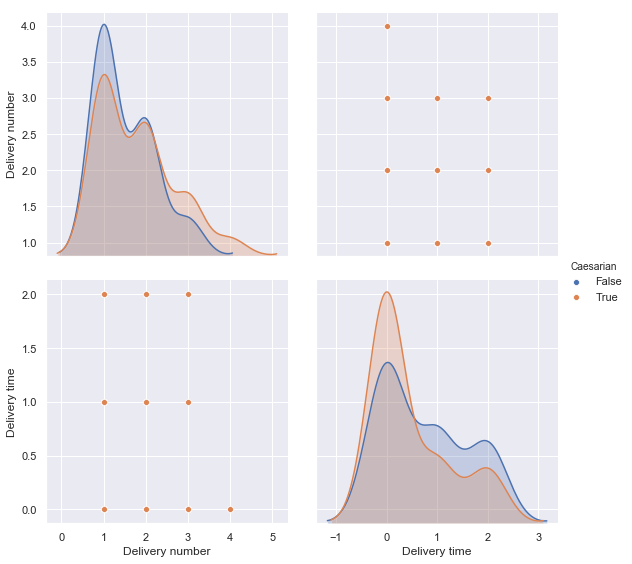

In [285]:
sns.pairplot(df, hue='Caesarian', height=4, vars=["Delivery number", "Delivery time"])

### Findidng for the 1st scater plot
This graph shows that the lower the delivery number 
the highest is the delivery time 
and the caesarian is also  correlated with it because
the lowest the delivery time the 
more chance you have to get a caesarian 


## Scatter plot 2

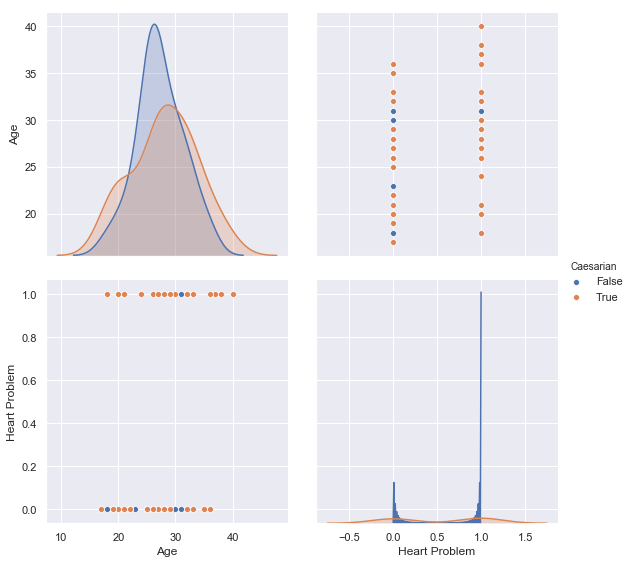

In [218]:
sns.pairplot(df, hue='Caesarian', height=4, vars=["Age", "Heart Problem"])

### Findidng for the 2nd scater plot
For the second scatter plot, the data is harder to read, but the first graph shows that the highest is your age the least change you have to get a Caesarian and around the age of 30 Caesarian stops 




## Bar graph

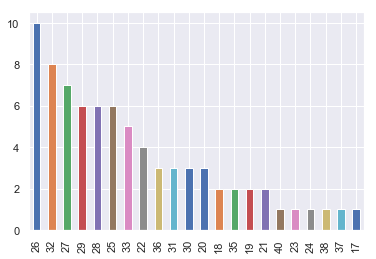

In [219]:
df['Age'].value_counts().plot(kind='bar')

### This bar graph shows the age distribution of the patients where the highest number of patients by age is 26 and the lowest is 17

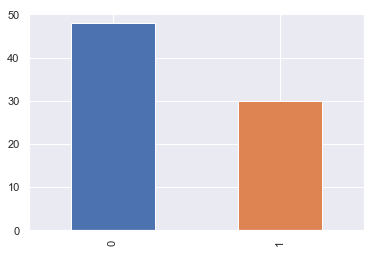

In [220]:
df['Heart Problem'].value_counts().plot(kind='bar')

### Bar graph about Heart problem


# Decision tree models

## Tree 1 - An unrestricted model.

In [221]:
df2 = pd.read_csv("caesarian.csv")
df2.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,False
1,26,2,0,1,0,True
2,26,2,1,1,0,False
3,28,1,0,2,0,False
4,22,2,0,1,0,True


In [222]:
h_dtree = tree.DecisionTreeClassifier(criterion='entropy')

In [223]:
features_df = df2.drop(['Caesarian'],axis=1)
features_df.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem
0,22,1,0,2,0
1,26,2,0,1,0
2,26,2,1,1,0
3,28,1,0,2,0
4,22,2,0,1,0


In [224]:
target_df = pd.DataFrame(df2['Caesarian'])
target_df.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [241]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')

In [261]:
dtree.fit(features_df,target_df)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [262]:
tree_print(dtree, features_df)

if Heart Problem =< 0.5: 
  |then if Age =< 21.5: 
  |  |then if Age =< 18.5: 
  |  |  |then if Blood of Pressure =< 0.5: 
  |  |  |  |then True
  |  |  |  |else False
  |  |  |else True
  |  |else if Delivery number =< 2.5: 
  |  |  |then if Age =< 31.5: 
  |  |  |  |then if Age =< 29.5: 
  |  |  |  |  |then if Age =< 28.5: 
  |  |  |  |  |  |then if Age =< 27.5: 
  |  |  |  |  |  |  |then if Delivery time =< 0.5: 
  |  |  |  |  |  |  |  |then if Age =< 26.5: 
  |  |  |  |  |  |  |  |  |then if Age =< 23.5: 
  |  |  |  |  |  |  |  |  |  |then if Blood of Pressure =< 1.5: 
  |  |  |  |  |  |  |  |  |  |  |then True
  |  |  |  |  |  |  |  |  |  |  |else False
  |  |  |  |  |  |  |  |  |  |else if Blood of Pressure =< 1.5: 
  |  |  |  |  |  |  |  |  |  |  |then if Age =< 25.5: 
  |  |  |  |  |  |  |  |  |  |  |  |then if Blood of Pressure =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then False
  |  |  |  |  |  |  |  |  |  |  |  |  |else False
  |  |  |  |  |  |  |  |  |  |  |  |else i

In [263]:
predict_array = dtree.predict(features_df)      

In [264]:
predicted_labels = pd.DataFrame(predict_array)  

In [265]:
predicted_labels.columns = ['Caesarian']

In [266]:
predicted_labels.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [267]:
target_df.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [268]:
print("My model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

My model accuracy is: 0.9615384615384616


## Tree 2 - A model whose performance is only ~10% worse than Tree 1

In [278]:
dtree2 =  tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [279]:
dtree2.fit(features_df,target_df)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [280]:
tree_print(dtree2,features_df)

if Heart Problem =< 0.5: 
  |then if Age =< 21.5: 
  |  |then if Age =< 18.5: 
  |  |  |then if Age =< 17.5: 
  |  |  |  |then True
  |  |  |  |else False
  |  |  |else True
  |  |else if Delivery number =< 2.5: 
  |  |  |then if Age =< 31.5: 
  |  |  |  |then if Age =< 29.5: 
  |  |  |  |  |then False
  |  |  |  |  |else False
  |  |  |  |else if Delivery number =< 1.5: 
  |  |  |  |  |then False
  |  |  |  |  |else True
  |  |  |else if Delivery time =< 1.0: 
  |  |  |  |then True
  |  |  |  |else False
  |else if Blood of Pressure =< 0.5: 
  |  |then True
  |  |else if Blood of Pressure =< 1.5: 
  |  |  |then if Delivery time =< 0.5: 
  |  |  |  |then if Age =< 23.5: 
  |  |  |  |  |then False
  |  |  |  |  |else True
  |  |  |  |else False
  |  |  |else if Delivery time =< 1.5: 
  |  |  |  |then True
  |  |  |  |else if Delivery number =< 2.0: 
  |  |  |  |  |then False
  |  |  |  |  |else True
<------------->
Tree Depth:  5


In [281]:
predict_array2 = dtree2.predict(features_df)   

In [282]:
predicted_labels2 = pd.DataFrame(predict_array2)

In [283]:
predicted_labels2.columns = ['Caesarian'] 

In [284]:
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels2)))

Our model accuracy is: 0.8461538461538461


## Final report

comparing the two tree model the tree model with the depth restriction of 5 still have a reasonable accuracy result at 86 and it's more readable and understandable. For a medical result 86 percent might not be enough, but overall it's a good accuracy result with good readability. 

I would still pick tree model one even though its depth is of 13 because its accuracy is better at 96 and it readability is good 